
Tree height: 0.002736
Tree length: 0.015428
strictly bifurcating tree

Numbers of objects in tree: 535 (267 nodes and 268 leaves)



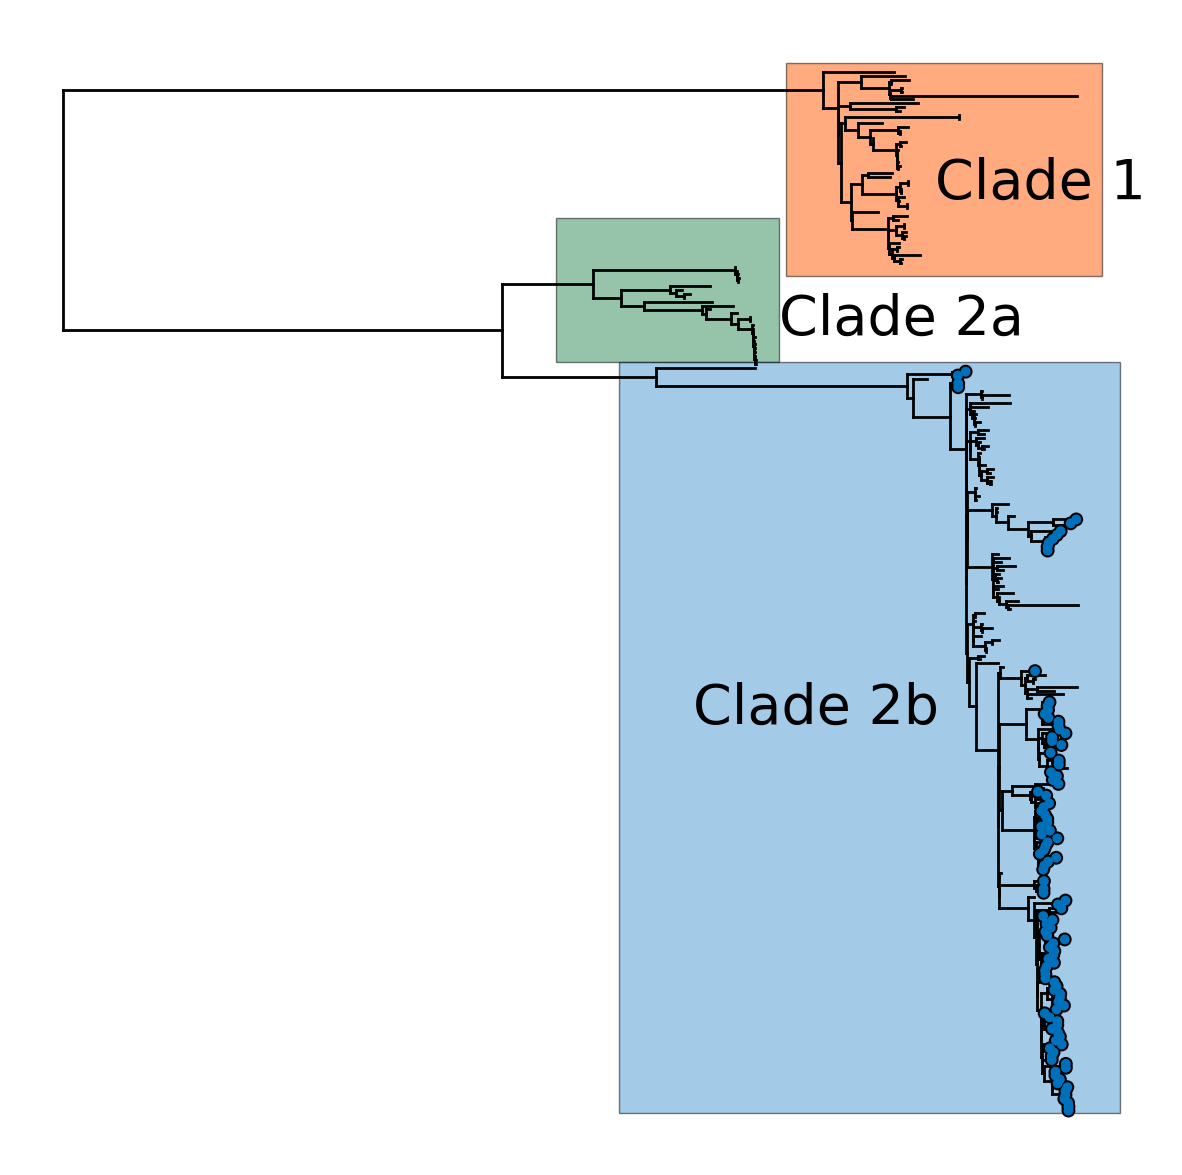

In [25]:
import baltic as bt
import requests
from io import StringIO as sio
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Polygon, PathPatch
from matplotlib.path import Path
from matplotlib.collections import LineCollection
from matplotlib import cm
import matplotlib.patheffects as path_effects
import numpy as np
from datetime import datetime as dt
import os
import PyAstronomy
from PyAstronomy import pyasl
import datetime
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.patheffects as path_effects
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Polygon
import pandas as pd
from matplotlib.patches import Rectangle

def get_all_terminals(node):

    terminals = []
    for i in node.children:
        if i.branchType == "leaf":
            terminals.append(i)
        if i.branchType != "leaf":
            terminals.extend(get_all_terminals(i))
    return terminals


mpl.rcParams['font.family'] = 'sans-serif'



df=pd.read_csv("anno.txt", sep="\t", header=None)
clade1_taxa=df[df[1]=="Clade1"][0].to_list()
clade2a_taxa=df[df[1]=="Clade2a"][0].to_list()
clade2b_taxa=df[df[1]=="Clade2b"][0].to_list()


ll=bt.loadNexus("All.nex")


ll.traverse_tree()
ll.treeStats()
ll.sortBranches()


for i in ll.Objects:
    if i.branchType == "leaf":
        if "VSP" in i.name and "DRC" not in i.name and "CAR" not in i.name and i.name not in clade1_taxa:
            i.traits["rate_signDistribution"]="NEW"
        elif "TRM" in i.name and "DRC" not in i.name and "CAR" not in i.name and i.name not in clade1_taxa:
            i.traits["rate_signDistribution"]="NEW"
        else:
            i.traits["rate_signDistribution"]="NO"


fig,ax = plt.subplots(figsize=(15,15),facecolor='w')

ll.traverse_tree()
ll.sortBranches(descending=False)
ll.sortBranches()


x_attr=lambda k: k.absoluteTime 
cmap=mpl.cm.viridis
c_func=lambda k: "#0070BB" if k.traits['rate_signDistribution']=='NEW' else "black"
s_func=lambda k: 50 if k.traits['rate_signDistribution']=='NEW' else 0


clade1_ancestor=ll.commonAncestor(ll.getExternal(lambda k: k.name in 
                                          clade1_taxa))
x=clade1_ancestor.absoluteTime
ver=[(x-0.0001,215),
     (x+0.00075,215),
     (x+0.00075,270),
     (x-0.0001,270)]

clade_1_pa = Polygon(ver, closed=True, edgecolor='black', facecolor='#FF5800', alpha=0.5)

ax.add_patch(clade_1_pa)

ax.text(x+0.0003, 235, s="Clade 1", fontsize=40)

clade2a_ancestor=ll.commonAncestor(ll.getExternal(lambda k: k.name in 
                                          clade2a_taxa))
x=clade2a_ancestor.absoluteTime
ver=[(x-0.0001,193),
     (x+0.0005,193),
     (x+0.0005,230),
     (x-0.0001,230)]

clade_2a_pa = Polygon(ver, closed=True, edgecolor='black', facecolor='#2E8B57', alpha=0.5)

ax.add_patch(clade_2a_pa)

ax.text(x+0.0005, 200, s="Clade 2a", fontsize=40)

clade2b_ancestor=ll.commonAncestor(ll.getExternal(lambda k: k.name in 
                                          clade2b_taxa))
x=clade2b_ancestor.absoluteTime
ver=[(x-0.0001,0),
     (x+0.00125,0),
     (x+0.00125,193),
     (x-0.0001,193)]

clade_2b_pa = Polygon(ver, closed=True, edgecolor='black', facecolor='#4997D0', alpha=0.5)

ax.add_patch(clade_2b_pa)


ax.text(x+0.0001, 100, s="Clade 2b", fontsize=40)
ll.plotTree(ax,x_attr=x_attr,colour="black", width=2)

ll.plotPoints(ax,x_attr=x_attr,size=s_func,colour=c_func,zorder=10)

ax.set_yticklabels([])
ax.set_xticklabels([])

ax.tick_params(axis='y',size=0)
ax.tick_params(axis='x',size=0)
[ax.spines[loc].set_visible(False) for loc in ['top','right','left','bottom']]

#ax.set_title('C', fontsize=25, loc='left')



plt.savefig("Global_phylogeny.png",bbox_inches='tight', dpi=1000)   
